In [19]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [11]:
datos = pd.DataFrame({
    'Experimento': range(1, 18),
    'x1': [41.9, 43.4, 43.9, 44.5, 47.3, 47.5, 47.9, 50.2, 52.8, 53.2, 56.7, 57.0, 63.5, 64.3, 71.1, 77.0, 77.8],
    'x2': [29.1, 29.3, 29.5, 29.7, 29.9, 30.3, 30.5, 30.7, 30.8, 30.9, 31.5, 31.7, 31.9, 32.0, 32.1, 32.5, 32.9],
    'y': [251.3, 251.3, 248.3, 267.5, 273.0, 276.5, 270.3, 274.9, 285.0, 290.0, 297.0, 302.5, 304.5, 309.3, 321.7, 330.7, 349.0]
})

datos.shape

(17, 4)

In [51]:
X = sm.add_constant(datos[['x1', 'x2']])
y = datos['y']
M1 = sm.OLS(y, X).fit()
M1.summary()

##               coef	std err	t	P>|t|	[0.025	0.975]
##Intercept	-151.7580	98.675	-1.538	0.146	-363.395	59.879
##x1	1.2539	0.388	3.233	0.006	0.422	2.086
##x2	12.0008	3.848	3.119	0.008	3.748	20.254
## Los coeficientes coinciden con los obtenidos con R

datos['y_pred'] = M1.predict(X)
datos.head()

,Experimento,x1,x2,y,y_pred
0,1,41.9,29.1,251.3,250.003747
1,2,43.4,29.3,251.3,254.284749
2,3,43.9,29.5,248.3,257.311858
3,4,44.5,29.7,267.5,260.464356
4,5,47.3,29.9,273.0,266.375419


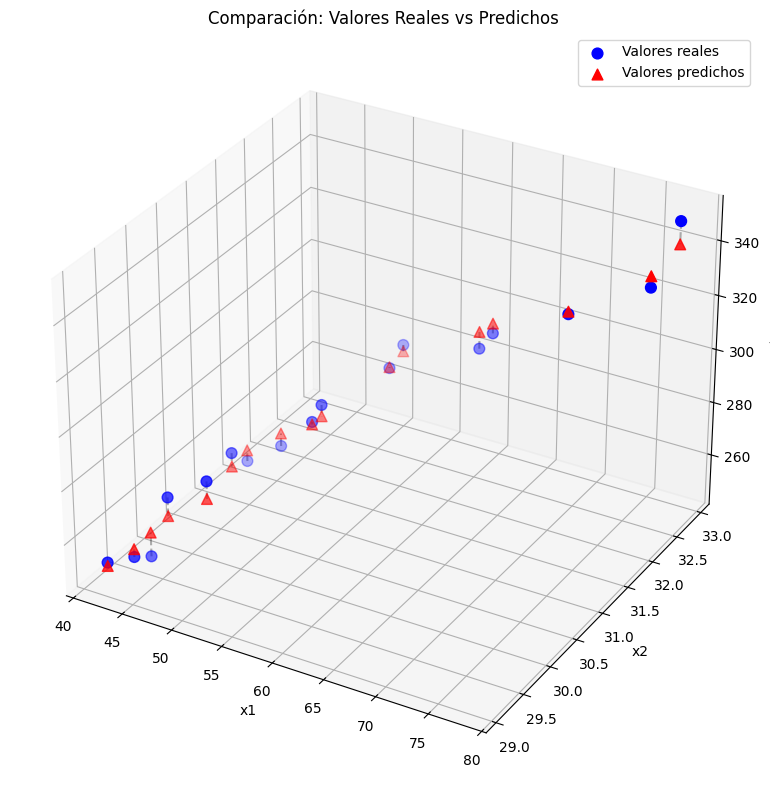

In [52]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Valores reales (azul)
ax.scatter(datos['x1'], datos['x2'], datos['y'],
           c='blue', marker='o', s=60, label='Valores reales')

# Valores predichos (rojo)
ax.scatter(datos['x1'], datos['x2'], datos['y_pred'],
           c='red', marker='^', s=60, label='Valores predichos')

# Conectar puntos reales con predichos
for i in range(len(datos)):
    ax.plot([datos['x1'].iloc[i], datos['x1'].iloc[i]],
            [datos['x2'].iloc[i], datos['x2'].iloc[i]],
            [datos['y'].iloc[i], datos['y_pred'].iloc[i]],
            'k--', alpha=0.3)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Comparación: Valores Reales vs Predichos')
ax.legend()

plt.tight_layout()
plt.show()